# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

###1) Write a function (Loop) S

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.
What is the probability that a person is drunk after one positive breathalyzer test?
What is the probability that a person is drunk after two positive breathalyzer tests?
How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



##A frequentist attempts to reason through "absolute" probabilities, whereas in bayesian statistics, reasoning is done through thinking of "relative" probabilities.

#Objective 1:
##Bayesian Function Loop
_________________________


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fbc03429e2004ffb6dbc12f166cf89fdfe9e0691)




In [6]:
#Variable declaration stating that my belief about drunk drivers in the world
prior_probability = 1/1000

#prob_drunk_prior = "Prior Pobability"
#In formula, What is the probability of a driver being drunk?
prob_drunk_prior = prior_probability

#prob_drunk_given_positive = True Positive
#In formula, this ingredient is represented as P(Positive|Drunk)
prob_drunk_given_positive = 1

#false_positive_rate = False Positive
#In formula,  What is the probability of a breathalyzer test being positive?
false_positive_rate = .08

#Creating a function that determines the probability of someone being truly drunk given that the breathalyzer test is positive using Bayes Theorem.
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  return(true_positive_rate * prob_drunk_prior) / false_positive_rate

#calling the function and passing our parameters
prob_drunk_given_positive(0.001, 0.08, 1)


0.0125

In [0]:
#We can conclude from this that the probability of a driver having a positive test and actually being drunk is 1.25%. 
#This means that in a population of 1000 tests, Where 80 test positive, only around 1.25% are actually drunk

In [8]:
prob_drunk_given_positive(0.004, 0.08, 1)

0.05

In [1]:
#importing libraries

from scipy import stats
import numpy as np


# Setting numpy Random Seed for Reproducibility
np.random.seed(seed=42)

#declaring variable to contain numpy binomial represents 
#represents the probability for x successes in n trials, given a success probability p for each trial.
coinflips = np.random.binomial(n=1, p=.5, size=100)
print(coinflips)

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0]


In [0]:
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean , mean-interval, mean+interval)

frequentist_confidence_interval = confidence_interval(coinflips)
frequentist_confidence_interval

In [1]:
#Exploring scipy.stats.bayes_mvs

import scipy
from scipy import stats
help(scipy.stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

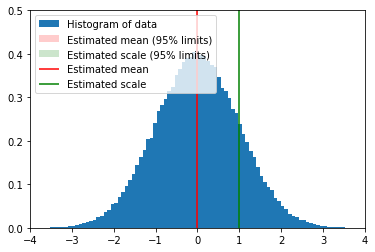

In [2]:
#Exploring with Visualizations from the help doc above

#from help doc
from scipy import stats
data = [6, 9, 12, 7, 8, 8, 13]
mean, var, std = stats.bayes_mvs(data)

n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
            label=r'Estimated scale (95% limits)')
    
ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

## Resources

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c2f6deb0f4f82939e185c1ed259423f2ff18e53a)

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!